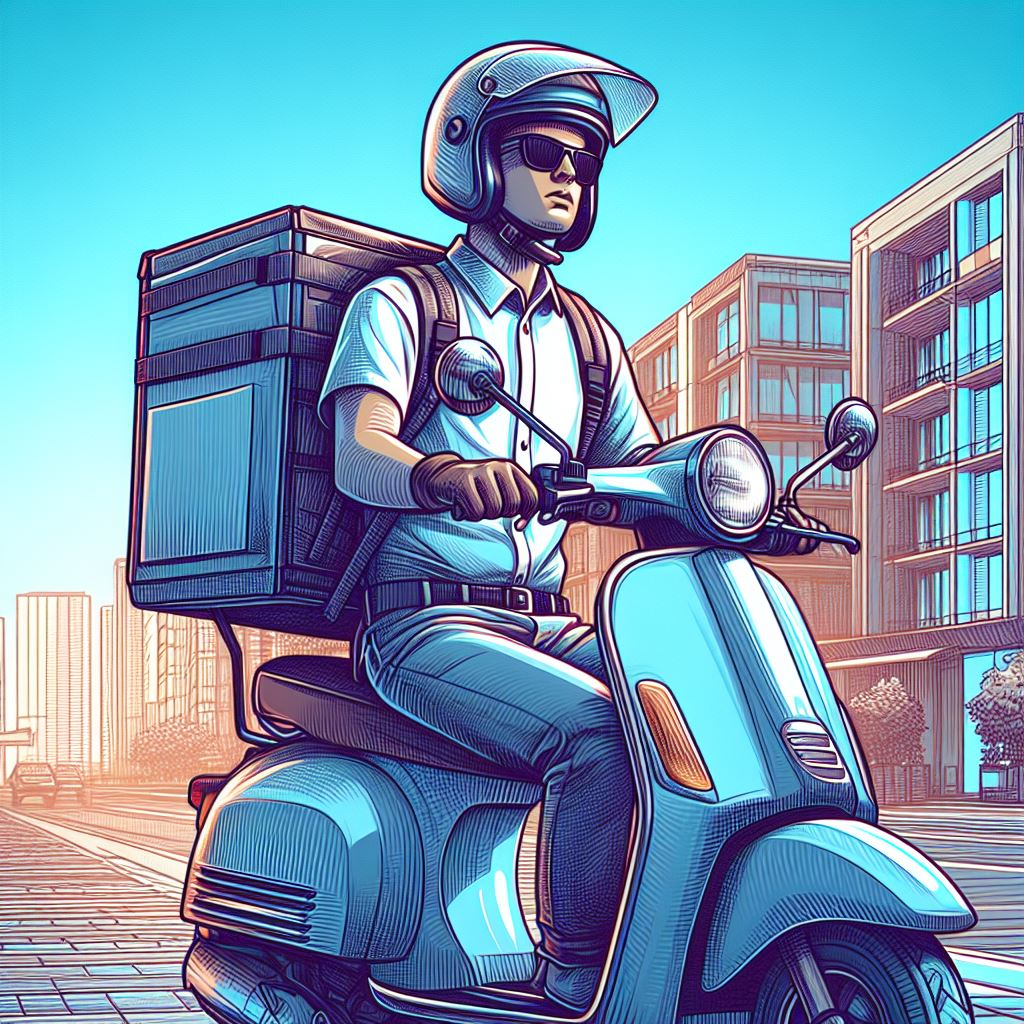


**Problem Statement:**

The aim of this project is to predict the delivery time of food orders using various features related to the delivery process. The dataset contains information about delivery person details, restaurant and delivery location coordinates, order timing, weather conditions, road traffic density, vehicle condition, type of order, type of vehicle, whether there are multiple deliveries, festivals, city, and the time taken for delivery

**Data Dictionary:**

- ID: Unique identifier for each order.
- Delivery_person_ID: Unique identifier for each delivery person.
- Delivery_person_Age: Age of the delivery person.
- Delivery_person_Ratings: Ratings of the delivery person.
- Restaurant_latitude: Latitude of the restaurant.
- Restaurant_longitude: Longitude of the restaurant.
- Delivery_location_latitude: Latitude of the delivery location.
- Delivery_location_longitude: Longitude of the delivery location.
- Order_Date: Date of the order.
- Time_Ordered: Time when the order was placed.
- Time_Order_picked: Time when the order was picked up for delivery.
- Weatherconditions: Weather conditions at the time of delivery.
- Road_traffic_density: Traffic density on the road at the time of delivery.
- Vehicle_condition: Condition of the delivery vehicle.
- Type_of_order: Type of food order (e.g., meal, buffet, drinks, snack).
- Type_of_vehicle: Type of vehicle used for delivery (e.g., motorcycle, scooter).
- multiple_deliveries: Indicates whether there are multiple deliveries being made simultaneously.
- Festival: Indicates if there is any festival or special occasion at the time of delivery.
- City: City where the delivery is being made.
- Time_taken(min): Time taken for delivery in minutes (target variable).


**Importing the necessary libraries**

In [ ]:
# Importing pandas for data manipulation
import pandas as pd

# Importing numpy for numerical computations
import numpy as np

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for enhanced data visualization
import seaborn as sns

# Importing warnings to handle warnings
import warnings

# Suppressing warnings (optional)
warnings.filterwarnings("ignore")


In [ ]:
#Loading the dataset
path="/content/drive/MyDrive/Delivery_time.csv"
df=pd.read_csv(path)

In [ ]:
# Display the number of rows and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
# Display the first 5 rows of the dataset
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
# Display the last 5 rows of the dataset
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


In [ ]:
# Checking for missing values
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

No missing values found

In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
# Summary statistics for categorical columns
df.describe(include="object").T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

Exploratory Data Analysis and Feature Engineering

In [ ]:
# Dropping the "ID" column as it is unique identifier
df.drop("ID",axis=1,inplace=True)

In [ ]:
# Checking for unique values in "Delivery_person_ID"
df["Delivery_person_ID"].nunique()

1320

In [ ]:
# Checking for unique values in "Delivery_person_ID"
df["Delivery_person_ID"].value_counts()

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64

In [ ]:
# Splitting the 'Delivery_person_ID' column by "RE" and keeping only the first part
df['Cleaned_Delivery_person_ID'] = df['Delivery_person_ID'].str.split('RE').str[0]

In [ ]:
# Checking for unique values in "Cleaned_Delivery_person_ID"
df["Cleaned_Delivery_person_ID"].nunique()

22

In [ ]:
# Checking for unique values in "Cleaned_Delivery_person_ID"
df["Cleaned_Delivery_person_ID"].value_counts()

JAP       3443
RANCHI    3229
BANG      3195
SUR       3187
HYD       3181
MUM       3173
MYS       3171
COIMB     3170
VAD       3166
INDO      3159
CHEN      3145
PUNE      3132
AGR        763
LUDH       758
ALH        740
KNP        740
DEH        737
GOA        709
AURG       703
KOC        701
KOL        700
BHP        691
Name: Cleaned_Delivery_person_ID, dtype: int64

In [ ]:
# Dropping the "Delivery_person_ID" column
df.drop("Delivery_person_ID",axis=1,inplace=True)

In [ ]:
# Checking for unique values in "Delivery_person_Age"
df["Delivery_person_Age"].value_counts()

35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64

In [ ]:
# Remove leading and trailing whitespaces
df['Delivery_person_Age'] = df['Delivery_person_Age'].str.strip()

# Replace empty strings with NaN
df['Delivery_person_Age'].replace('', np.nan, inplace=True)

# Convert to integer dtype
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float).astype('Int64')

In [ ]:
# Replacing "Nan" with median
df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].median(),inplace=True)

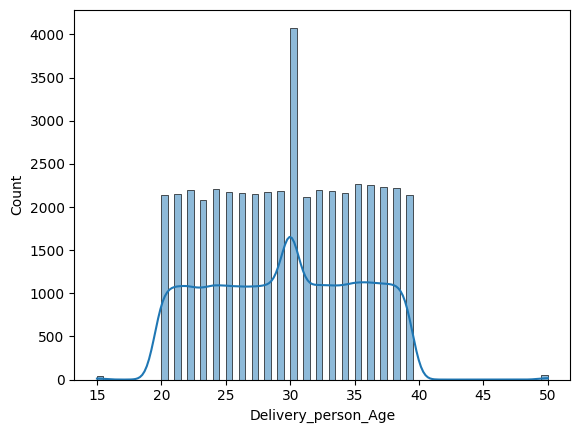

In [ ]:
# Plotting the distribution of "Delivery_person_Age using a histogram
sns.histplot(df["Delivery_person_Age"],kde=True)
plt.show()


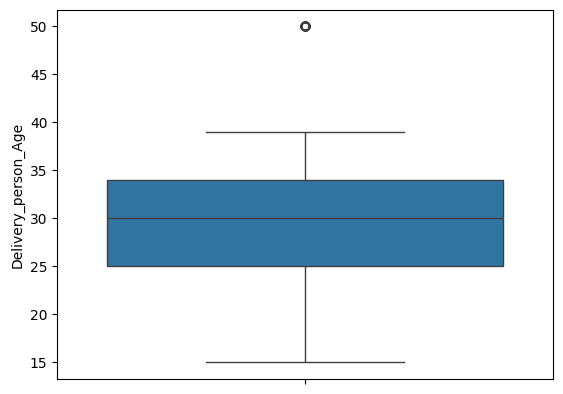

In [ ]:
# Checking for outliers
sns.boxplot(df["Delivery_person_Age"])
plt.show()

In many regions, the legal minimum age for employment or for operating a vehicle (such as a scooter) is commonly 18 or 20 years. Capping ages below 20 aligns with these practical considerations

In [ ]:
# Cap values less than 20 in 'Delivery_person_Age' column
lower_bound_age = 20
df['Delivery_person_Age'] = df['Delivery_person_Age'].clip(lower=lower_bound_age)

In [ ]:
# Checking value counts in "Delivery_person_Ratings"
df["Delivery_person_Ratings"].value_counts()

4.8     7148
4.7     7142
4.9     7041
4.6     6940
5       3996
4.5     3303
NaN     1908
4.1     1430
4.2     1418
4.3     1409
4.4     1361
4       1077
3.5      249
3.8      228
3.7      225
3.6      207
3.9      197
6         53
1         38
3.4       32
3.1       29
3.2       29
3.3       25
2.6       22
2.7       22
2.5       20
2.8       19
2.9       19
3          6
Name: Delivery_person_Ratings, dtype: int64

In [ ]:
# Remove leading and trailing whitespaces
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].str.strip()

# Replace empty strings with NaN
df['Delivery_person_Ratings'].replace('', np.nan, inplace=True)

# Convert to float dtype
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

# Round float values to nearest integer
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].round().astype('Int64')


In [ ]:
# Replacing "Nan" with median
df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].median(),inplace=True)

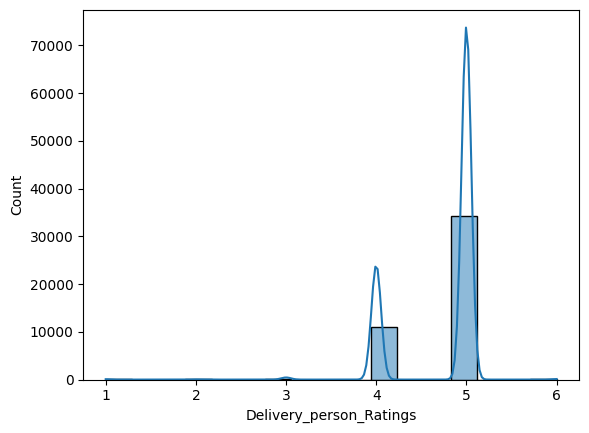

In [ ]:
# Plotting the distribution of "Delivery_person_Ratings using a histogram
sns.histplot(df["Delivery_person_Ratings"],kde=True)
plt.show()

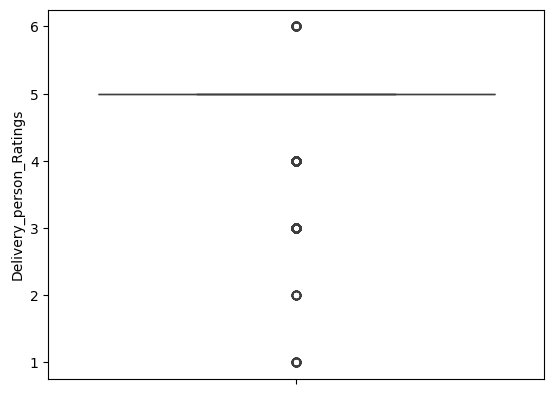

In [ ]:
# Checking for outliers
sns.boxplot(df["Delivery_person_Ratings"])
plt.show()

We capped the upper bound of the 'Delivery_person_Ratings' column at 5 and rounded the values to the nearest integer to align with the common rating scale of 1 to 5.

In [ ]:
# Cap upper bound for values greater than 5
upper_bound = 5
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].clip(upper=upper_bound)

# Round float values to nearest integer
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].round().astype('Int64')


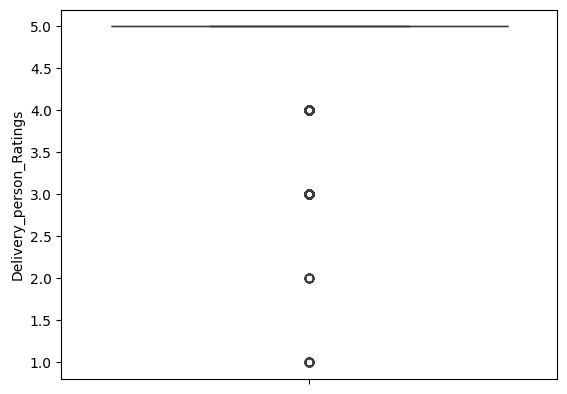

In [ ]:
# Checking for outliers
sns.boxplot(df["Delivery_person_Ratings"])
plt.show()

We calculated the distance in kilometers between the restaurant and delivery locations using the Haversine formula, providing valuable information for optimizing delivery routes and  easy calculations

In [ ]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    """
    Convert degrees to radians.

    Parameters:
    degrees (float): Angle in degrees.

    Returns:
    float: Angle in radians.
    """
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points using the Haversine formula.

    Parameters:
    lat1 (float): Latitude of the first point.
    lon1 (float): Longitude of the first point.
    lat2 (float): Latitude of the second point.
    lon2 (float): Longitude of the second point.

    Returns:
    float: Distance between the two points in kilometers.
    """
    # Convert latitude and longitude differences from degrees to radians
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)

    # Haversine formula
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    # Calculate the distance using the formula and the earth's radius
    return R * c

# Calculate the distance between each pair of points
df['distance'] = df.apply(lambda row: distcalculate(row['Restaurant_latitude'],
                                                    row['Restaurant_longitude'],
                                                    row['Delivery_location_latitude'],
                                                    row['Delivery_location_longitude']),
                          axis=1)

# Convert the 'distance' column to float64 dtype if necessary
df['distance'] = df['distance'].astype('float64')


In [ ]:
# Drop the original latitude and longitude columns
df.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)

In [ ]:
# Drop Order_Date column as it is of no use
df.drop('Order_Date', axis=1, inplace=True)

In [ ]:
df["Weatherconditions"].value_counts()

conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: Weatherconditions, dtype: int64

In [ ]:
#Removing leading and trailing whitespaces
df["Weatherconditions"] = df["Weatherconditions"].str.strip()

In [ ]:
df["Weatherconditions"].value_counts()

conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: Weatherconditions, dtype: int64

In [ ]:
# Removing the string "conditions" from the values
df["Weatherconditions"] = df["Weatherconditions"].str.replace("conditions", "")

# Display the value counts of the "Weatherconditions" column to verify the changes
print(df['Weatherconditions'].value_counts(dropna=False))

 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
 NaN            616
Name: Weatherconditions, dtype: int64


In [ ]:
df["Weatherconditions"] = df["Weatherconditions"].str.replace("NaN", "")

In [ ]:
df["Weatherconditions"].value_counts()

 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
                616
Name: Weatherconditions, dtype: int64

In [ ]:
# Replacing the empty strings with NaN
df['Weatherconditions'].replace('', np.nan, inplace=True)

In [ ]:
df["Weatherconditions"].value_counts()

 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
                616
Name: Weatherconditions, dtype: int64

In [ ]:
# Replace empty strings with NaN values
df['Weatherconditions'].replace(' ', pd.NA, inplace=True)

# Calculate the value counts of the "Weatherconditions" column
weather_value_counts = df['Weatherconditions'].value_counts(dropna=False)

# Display the value counts
print(weather_value_counts)


 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
<NA>            616
Name: Weatherconditions, dtype: int64


In [ ]:
# Calculate the mode of the "Weatherconditions" column
mode_weather = df['Weatherconditions'].mode().iloc[0]

# Fill NaN values with the mode
df['Weatherconditions'].fillna(mode_weather, inplace=True)

# Display the value counts of the "Weatherconditions" column to verify the changes
print(df['Weatherconditions'].value_counts(dropna=False))

 Fog           8270
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
Name: Weatherconditions, dtype: int64


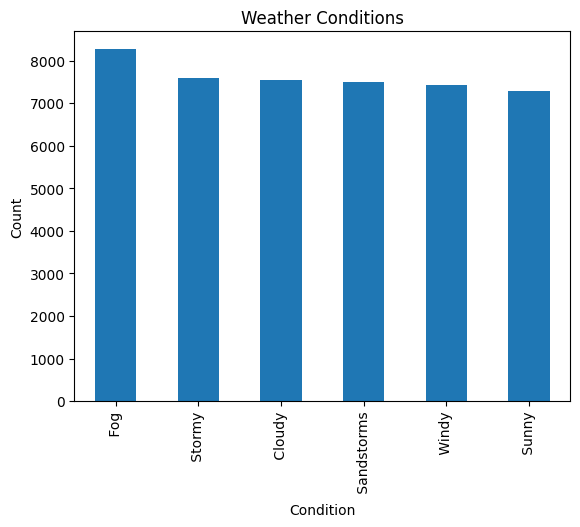

In [ ]:
# Calculate the value counts of the "Weatherconditions" column
weather_value_counts = df['Weatherconditions'].value_counts(dropna=False)

# Plot the value counts
weather_value_counts.plot(kind='bar')
plt.title('Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

**Insights:**
- Foggy conditions are observed most frequently during deliveries, followed by stormy, cloudy, and windy conditions.
- Sandstorms and sunny weather occur less frequently compared to the other conditions.
- The frequency of weather conditions provides insight into the varying challenges delivery services may face when planning and executing deliveries.

**Dealing with Date and Time Columns**

In [ ]:
# Step 1: Convert columns to datetime
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')

In [ ]:
df.isnull().sum()

Delivery_person_Age              0
Delivery_person_Ratings          0
Time_Orderd                   1731
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
Cleaned_Delivery_person_ID       0
distance                         0
dtype: int64

In [ ]:
# Step 2: Extract minutes and store them in new columns
df['Time_Orderd_Minutes'] = df['Time_Orderd'].dt.hour * 60 + df['Time_Orderd'].dt.minute
df['Time_Order_picked_Minutes'] = df['Time_Order_picked'].dt.hour * 60 + df['Time_Order_picked'].dt.minute

# Step 3: Fill missing values with median
median_orderd_minutes = df['Time_Orderd_Minutes'].median()
median_picked_minutes = df['Time_Order_picked_Minutes'].median()

df['Time_Orderd_Minutes'].fillna(median_orderd_minutes, inplace=True)
df['Time_Order_picked_Minutes'].fillna(median_picked_minutes, inplace=True)

# Step 4: Calculate the difference in minutes
df['Time_Difference_Minutes'] = df['Time_Order_picked_Minutes'] - df['Time_Orderd_Minutes']

# Step 5: Cap values to a minimum of 5 and a maximum of 15 minutes
df['Time_Difference_Minutes'] = df['Time_Difference_Minutes'].clip(lower=5, upper=15)

# Print the DataFrame to verify the changes
print(df)


       Delivery_person_Age  Delivery_person_Ratings         Time_Orderd  \
0                       37                        5 2024-02-24 11:30:00   
1                       34                        4 2024-02-24 19:45:00   
2                       23                        4 2024-02-24 08:30:00   
3                       38                        5 2024-02-24 18:00:00   
4                       32                        5 2024-02-24 13:30:00   
...                    ...                      ...                 ...   
45588                   30                        5 2024-02-24 11:35:00   
45589                   21                        5 2024-02-24 19:55:00   
45590                   30                        5 2024-02-24 23:50:00   
45591                   20                        5 2024-02-24 13:35:00   
45592                   23                        5 2024-02-24 17:10:00   

        Time_Order_picked Weatherconditions Road_traffic_density  \
0     2024-02-24 11:45:00      

In [ ]:
df["Time_Difference_Minutes"].value_counts()

5.0     16306
15.0    14977
10.0    14310
Name: Time_Difference_Minutes, dtype: int64

In [ ]:
# Dropping the "Time_Orderd" and "Time_Order_picked" columns
df.drop(['Time_Orderd', 'Time_Order_picked'], axis=1, inplace=True)

In [ ]:
# Dropping the "Time_Orderd_Minutes" and "Time_Order_picked_Minutes" columns
df.drop(['Time_Orderd_Minutes', 'Time_Order_picked_Minutes'], axis=1, inplace=True)

In [ ]:
df["Road_traffic_density"].value_counts()

Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: Road_traffic_density, dtype: int64

In [ ]:
df["Road_traffic_density"] = df["Road_traffic_density"].str.replace("NaN", "")

In [ ]:
# Replace empty strings with NaN values
df['Road_traffic_density'].replace(' ', pd.NA, inplace=True)

# Calculate the value counts of the "Road_traffic_density" column
Road_traffic_density_value_counts = df["Road_traffic_density"].value_counts(dropna=False)

# Display the value counts
print(Road_traffic_density_value_counts)


Low        15477
Jam        14143
Medium     10947
High        4425
<NA>         601
Name: Road_traffic_density, dtype: int64


In [ ]:
# Calculate the mode of the "Road_traffic_density" column
mode_road = df['Road_traffic_density'].mode().iloc[0]

# Fill NaN values with the mode
df['Road_traffic_density'].fillna(mode_road, inplace=True)

# Display the value counts of the "Weatherconditions" column to verify the changes
print(df['Road_traffic_density'].value_counts(dropna=False))

Low        16078
Jam        14143
Medium     10947
High        4425
Name: Road_traffic_density, dtype: int64


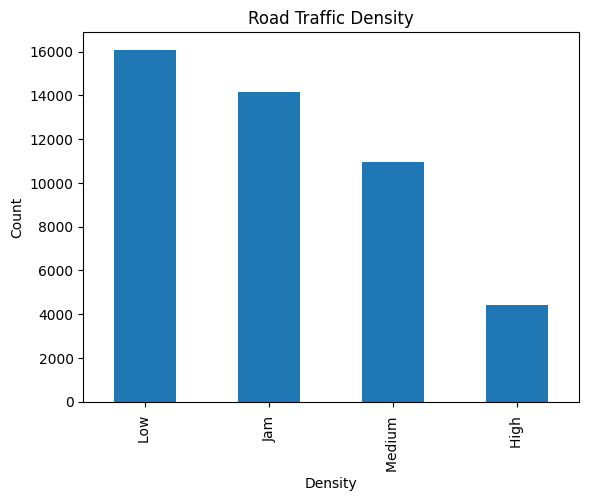

In [ ]:
# Plot bar chart for Road_traffic_density
df['Road_traffic_density'].value_counts().plot(kind='bar')
plt.title('Road Traffic Density')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()


**Insights**

The "Road_traffic_density" column contains four categories: Low, Jam, Medium, and High.

The most frequent traffic density is Low, followed by Jam, Medium, and High.

Low traffic density is observed most frequently, indicating smoother traffic flow during deliveries.

Jammed traffic conditions occur frequently, potentially leading to delays in delivery times.

Medium and high traffic densities are less common compared to low and jammed conditions.

In [ ]:
df["Vehicle_condition"].value_counts()

2    15034
1    15030
0    15009
3      520
Name: Vehicle_condition, dtype: int64

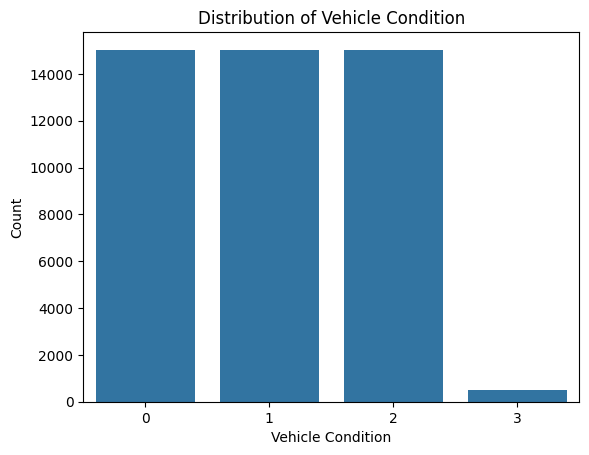

In [ ]:
# Plotting the distribution of "Vehicle_condition" using a bar plot
sns.countplot(data=df, x="Vehicle_condition")
plt.title('Distribution of Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.show()


In [ ]:
df["Type_of_order"].value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64

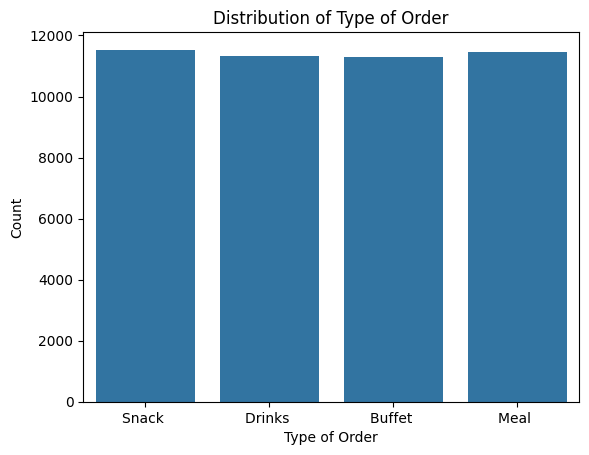

In [ ]:
# Plotting the distribution of "Type_of_order" using a bar plot
sns.countplot(data=df, x="Type_of_order")
plt.title('Distribution of Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Count')
plt.show()

In [ ]:
df["Type_of_vehicle"].value_counts()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

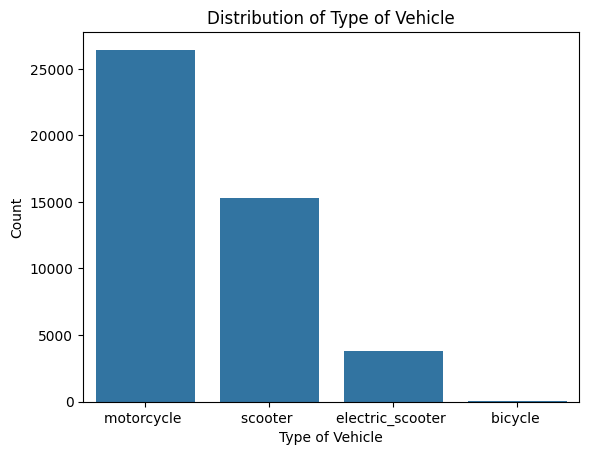

In [ ]:
# Plotting the distribution of "Type_of_vehicle" using a bar plot
sns.countplot(data=df, x="Type_of_vehicle")
plt.title('Distribution of Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()

**Insights**
- The majority of deliveries are made using motorcycles (26435 occurrences), followed by scooters (15276).
- Electric scooters are used less frequently compared to motorcycles and scooters, with 3814 occurrences.
- Deliveries made by bicycle are the least common, occurring only 68 times.


In [ ]:
 df["multiple_deliveries"].value_counts()

1       28159
0       14095
2        1985
NaN       993
3         361
Name: multiple_deliveries, dtype: int64

In [ ]:
# Changing the data type of "multiple_deliveries" column errors='coerce'
df["multiple_deliveries"] = pd.to_numeric(df["multiple_deliveries"], errors='coerce')

In [ ]:
df["multiple_deliveries"].value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

In [ ]:
# Checking for missing values in the "multiple_deliveries" column
df["multiple_deliveries"].isnull().sum()

993

In [ ]:
# Filling missing values with mode
df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0], inplace=True)

In [ ]:
df["multiple_deliveries"].value_counts()

1.0    29152
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

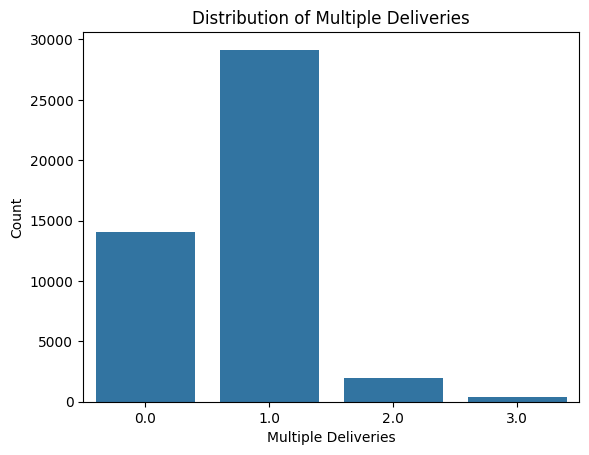

In [ ]:
# Plotting countplot
sns.countplot(data=df, x="multiple_deliveries")
plt.title('Distribution of Multiple Deliveries')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Count')
plt.show()

In [ ]:
df["Festival"].value_counts()

No      44469
Yes       896
NaN       228
Name: Festival, dtype: int64

In [ ]:
df["Festival"] = df["Festival"].str.replace("NaN", "")

In [ ]:
df["Festival"].value_counts()

No      44469
Yes       896
          228
Name: Festival, dtype: int64

In [ ]:
# Replacing the empty strings with NaN
df['Festival'].replace(' ', pd.NA, inplace=True)
#Fill NaN values with mode
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)

# Calculate the value counts of the "Festival" column
festival_value_counts = df['Festival'].value_counts(dropna=False)

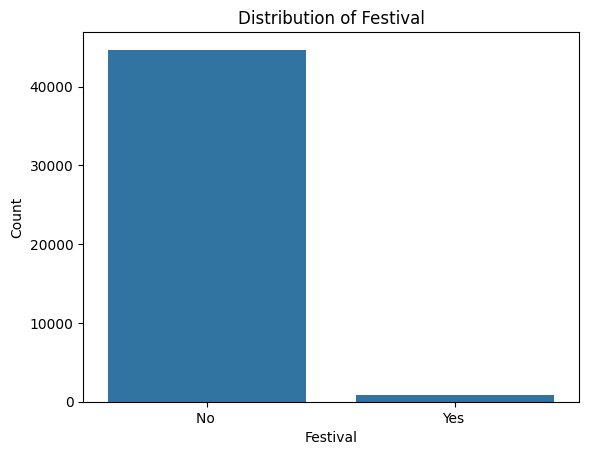

In [ ]:
# Plotting countplot
sns.countplot(data=df, x="Festival")
plt.title('Distribution of Festival')
plt.xlabel('Festival')
plt.ylabel('Count')
plt.show()

In [ ]:
df["City"].value_counts()

Metropolitian     34093
Urban             10136
NaN                1200
Semi-Urban          164
Name: City, dtype: int64

In [ ]:
df["City"]=df["City"].str.replace("NaN", "")

In [ ]:
# Replacing the empty strings with NaN
df['City'].replace(' ', pd.NA, inplace=True)
#Fill NaN values with mode
df['City'].fillna(df['City'].mode()[0], inplace=True)

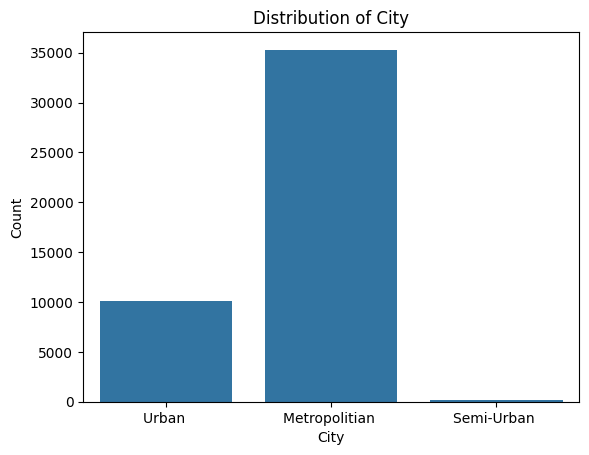

In [ ]:
# Plotting countplot
sns.countplot(data=df, x="City")
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

**Insights**
Most of the deliveries are taking place in Metropolitan city followed by Urban City and Semi-Urban Cities

In [ ]:
# Remove "(min)" string from "Time_taken(min)" column
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '')

# Print the DataFrame to verify the changes
print(df)


       Delivery_person_Age  Delivery_person_Ratings Weatherconditions  \
0                       37                        5             Sunny   
1                       34                        4            Stormy   
2                       23                        4        Sandstorms   
3                       38                        5             Sunny   
4                       32                        5            Cloudy   
...                    ...                      ...               ...   
45588                   30                        5             Windy   
45589                   21                        5             Windy   
45590                   30                        5            Cloudy   
45591                   20                        5            Cloudy   
45592                   23                        5               Fog   

      Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
0                    High                   

In [ ]:
# Remove parentheses from all values in "Time_taken(min)" column
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(\)', '')

In [ ]:
# Convert "Time_taken(min)" column to numeric
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')

In [ ]:
# Use pd.get_dummies() to create dummy variables for all categorical columns
df = pd.get_dummies(df, columns=['City', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'Weatherconditions','Cleaned_Delivery_person_ID'],drop_first=True)

We used `pd.get_dummies()` to convert categorical columns into dummy variables, effectively transforming categorical data into numerical format for analysis.

- For each categorical column specified (e.g., 'City', 'Road_traffic_density'), dummy variables were created, where each unique category becomes a binary column.
- The `drop_first=True` parameter was used to drop the first category for each column to avoid multicollinearity issues in regression models.
- This process enables us to include categorical data in machine learning models, as they typically require numerical inputs, allowing us to analyze and make predictions based on categorical features in the dataset.

In [ ]:
# Checking correlation with Target variable "Time_taken(min)"
df.corr()['Time_taken(min)'].sort_values(ascending=False)

Time_taken(min)                      1.000000
Road_traffic_density_Jam             0.348888
multiple_deliveries_2.0              0.321955
Delivery_person_Age                  0.293294
Festival_Yes                         0.290046
multiple_deliveries_3.0              0.204930
Type_of_vehicle_motorcycle           0.164121
City_Semi-Urban                      0.150067
Weatherconditions_ Fog               0.122647
multiple_deliveries_1.0              0.059886
Road_traffic_density_Medium          0.024263
Time_Difference_Minutes              0.012597
Cleaned_Delivery_person_ID_JAP       0.012108
Cleaned_Delivery_person_ID_ALH       0.010063
Type_of_order_Meal                   0.007697
Cleaned_Delivery_person_ID_BHP       0.006628
Cleaned_Delivery_person_ID_DEH       0.005224
Cleaned_Delivery_person_ID_AURG      0.004722
Cleaned_Delivery_person_ID_HYD       0.003990
Cleaned_Delivery_person_ID_CHEN      0.001867
Cleaned_Delivery_person_ID_PUNE      0.001435
Cleaned_Delivery_person_ID_KOL    

Top 3 factors affecting delivery time are :-

1. Road_traffic_density
2. multiple_deliveries
3. Delivery_person_Age

In [ ]:
# Selecting features
X = df.drop(['Time_taken(min)'], axis=1)
y = df[['Time_taken(min)']]

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
# X represents the features (independent variables) and y represents the target variable (dependent variable)
# The test_size parameter specifies the proportion of the dataset to include in the testing set, here set to 30%
# The random_state parameter ensures reproducibility of the split by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train = scaler.fit_transform(X_train)

# Transform the test features using the same scaler
X_test = scaler.transform(X_test)

# Scale the target variable
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.values.reshape(-1, 1)).flatten()


We performed scaling to ensure all features and the target variable are on a similar scale, optimizing the performance of machine learning algorithms.

**Linear Regression**

In [ ]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_linear_reg = linear_reg_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_linear_reg = mean_squared_error(y_train, y_train_pred_linear_reg)
rmse_train_linear_reg = np.sqrt(mse_train_linear_reg)
mae_train_linear_reg = mean_absolute_error(y_train, y_train_pred_linear_reg)
r2_train_linear_reg = r2_score(y_train, y_train_pred_linear_reg)
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r2_train_linear_reg = 1 - (1 - r2_train_linear_reg) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_linear_reg = mean_squared_error(y_test, y_test_pred_linear_reg)
rmse_test_linear_reg = np.sqrt(mse_test_linear_reg)
mae_test_linear_reg = mean_absolute_error(y_test, y_test_pred_linear_reg)
r2_test_linear_reg = r2_score(y_test, y_test_pred_linear_reg)
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r2_test_linear_reg = 1 - (1 - r2_test_linear_reg) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Linear Regression model
print("\nLinear Regression Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_train_linear_reg)
print("Mean Absolute Error (MAE):", mae_train_linear_reg)
print("R-squared (R2):", r2_train_linear_reg)
print("Adjusted R-squared:", adj_r2_train_linear_reg)
print("\nLinear Regression Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_test_linear_reg)
print("Mean Absolute Error (MAE):", mae_test_linear_reg)
print("R-squared (R2):", r2_test_linear_reg)
print("Adjusted R-squared:", adj_r2_test_linear_reg)



Linear Regression Model Metrics - Training Set:
Mean Squared Error (MSE): 0.44590454873613045
Root Mean Squared Error (RMSE): 0.6677608469625412
Mean Absolute Error (MAE): 0.5265869978523757
R-squared (R2): 0.5540954512638696
Adjusted R-squared: 0.5534518084484479

Linear Regression Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.4484370487490744
Root Mean Squared Error (RMSE): 0.6696544248708243
Mean Absolute Error (MAE): 0.5288391014095349
R-squared (R2): 0.5494946516481918
Adjusted R-squared: 0.5479743489540253


**Decision Tree Regressor**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameters and their distribution for randomized search
param_dist = {
    'max_depth': randint(3, 10),  # Narrowed max_depth range
    'min_samples_split': randint(5, 15),  # Adjusted min_samples_split range
    'min_samples_leaf': randint(1, 5),  # Adjusted min_samples_leaf range
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=tree_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the decision tree regressor model with the best hyperparameters
best_tree_model = DecisionTreeRegressor(**best_params, random_state=42)

# Train the model on the training data
best_tree_model.fit(X_train, y_train)

# Predict the target variable for the training and testing sets
y_train_pred_best = best_tree_model.predict(X_train)
y_test_pred_best = best_tree_model.predict(X_test)

# Evaluate the model performance
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

# Calculate adjusted R-squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train_best = 1 - (1 - r2_train_best) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test_best = 1 - (1 - r2_test_best) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the model with best hyperparameters
print("\nModel with Best Hyperparameters - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_best)
print("Root Mean Squared Error (RMSE):", rmse_train_best)
print("Mean Absolute Error (MAE):", mae_train_best)
print("R-squared (R2):", r2_train_best)
print("Adjusted R-squared (Adj R2):", adj_r2_train_best)

print("\nModel with Best Hyperparameters - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_best)
print("Root Mean Squared Error (RMSE):", rmse_test_best)
print("Mean Absolute Error (MAE):", mae_test_best)
print("R-squared (R2):", r2_test_best)
print("Adjusted R-squared (Adj R2):", adj_r2_test_best)


Best Hyperparameters: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 12}

Model with Best Hyperparameters - Training Set Metrics:
Mean Squared Error (MSE): 0.239508626886554
Root Mean Squared Error (RMSE): 0.4893961860155369
Mean Absolute Error (MAE): 0.37905532300226835
R-squared (R2): 0.7604913731134461
Adjusted R-squared (Adj R2): 0.7601456533683482

Model with Best Hyperparameters - Testing Set Metrics:
Mean Squared Error (MSE): 0.25625024394032836
Root Mean Squared Error (RMSE): 0.5062116592299395
Mean Absolute Error (MAE): 0.39491426327730833
R-squared (R2): 0.7425678682579819
Adjusted R-squared (Adj R2): 0.741699122160107


**Random Forest Regressor**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters and their distributions
param_dist = {
    'n_estimators': randint(10, 50),  # Number of trees in the forest
    'max_depth': randint(3, 10),       # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize the random forest regressor model
forest_model = RandomForestRegressor(random_state=42)

# Perform randomized search with fewer iterations for faster execution
random_search = RandomizedSearchCV(estimator=forest_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Initialize the random forest regressor model with the best hyperparameters
best_forest_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model on the training data
best_forest_model.fit(X_train, y_train)

# Predict the target variable for the training and testing sets
y_train_pred_best = best_forest_model.predict(X_train)
y_test_pred_best = best_forest_model.predict(X_test)

# Evaluate the model performance
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

# Calculate adjusted R-squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adj_r2_train_best = 1 - (1 - r2_train_best) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test_best = 1 - (1 - r2_test_best) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the model with best hyperparameters
print("\nModel with Best Hyperparameters - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_best)
print("Root Mean Squared Error (RMSE):", rmse_train_best)
print("Mean Absolute Error (MAE):", mae_train_best)
print("R-squared (R2):", r2_train_best)
print("Adjusted R-squared (Adj R2):", adj_r2_train_best)

print("\nModel with Best Hyperparameters - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_best)
print("Root Mean Squared Error (RMSE):", rmse_test_best)
print("Mean Absolute Error (MAE):", mae_test_best)
print("R-squared (R2):", r2_test_best)
print("Adjusted R-squared (Adj R2):", adj_r2_test_best)


Best Hyperparameters: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 17}

Model with Best Hyperparameters - Training Set Metrics:
Mean Squared Error (MSE): 0.22622644222450033
Root Mean Squared Error (RMSE): 0.47563267573254503
Mean Absolute Error (MAE): 0.37208825881914714
R-squared (R2): 0.7737735577754997
Adjusted R-squared (Adj R2): 0.7734470102562853

Model with Best Hyperparameters - Testing Set Metrics:
Mean Squared Error (MSE): 0.24174271591604526
Root Mean Squared Error (RMSE): 0.4916733833715684
Mean Absolute Error (MAE): 0.3871281518714865
R-squared (R2): 0.7571423084933167
Adjusted R-squared (Adj R2): 0.7563227461861266


**Summary**

In [2]:
# Create a dictionary to store the metrics for each model
metrics_dict = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)', 'Adjusted R-squared (Adj R2)'],
    'Linear Regression Training': [0.4459, 0.6678, 0.5266, 0.5541, 0.5535],
    'Linear Regression Testing': [0.4484, 0.6697, 0.5288, 0.5495, 0.5480],
    'Decision Tree Training': [0.2395, 0.4894, 0.3791, 0.7605, 0.7601],
    'Decision Tree Testing': [0.2563, 0.5062, 0.3949, 0.7426, 0.7417],
    'Random Forest Training': [0.2262, 0.4756, 0.3721, 0.7738, 0.7734],
    'Random Forest Testing': [0.2417, 0.4917, 0.3871, 0.7571, 0.7563]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the summary table
metrics_df


,Metric,Linear Regression Training,Linear Regression Testing,Decision Tree Training,Decision Tree Testing,Random Forest Training,Random Forest Testing
0,Mean Squared Error (MSE),0.4459,0.4484,0.2395,0.2563,0.2262,0.2417
1,Root Mean Squared Error (RMSE),0.6678,0.6697,0.4894,0.5062,0.4756,0.4917
2,Mean Absolute Error (MAE),0.5266,0.5288,0.3791,0.3949,0.3721,0.3871
3,R-squared (R2),0.5541,0.5495,0.7605,0.7426,0.7738,0.7571
4,Adjusted R-squared (Adj R2),0.5535,0.5480,0.7601,0.7417,0.7734,0.7563


**Results**

Based on the performance metrics displayed in the summary table:

- The Random Forest model consistently outperforms both the Linear Regression and Decision Tree models across all metrics on both the training and testing sets.
- It has the lowest values for Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), indicating better accuracy and precision.
- Additionally, the Random Forest model exhibits higher R-squared (R2) and Adjusted R-squared (Adj R2) values, suggesting better goodness of fit to the data compared to the other models.

Therefore, based on these observations, the Random Forest model is the best model among the three for predicting delivery time in this scenario.

**Business Conclusions:**

The top three factors affecting delivery time are as follows:

1. **Road Traffic Density**: High road traffic density leads to delays in delivery as it slows down the movement of delivery vehicles, resulting in longer travel times between the restaurant and the delivery location. This factor is critical as it directly impacts the speed at which orders can be fulfilled.

2. **Multiple Deliveries**: When a delivery person has to make multiple deliveries during a single trip, it increases the overall time spent on the road. Each additional stop adds to the total delivery time, especially if the locations are spread out or if there are delays in finding addresses or parking.

3. **Delivery Person Age**: The age of the delivery person may also play a role in delivery time. Younger delivery persons may be more agile and efficient, potentially completing deliveries faster than older individuals.
